<a href="https://colab.research.google.com/github/SaiDhinakar/cv-intro/blob/main/Image_segmentation_using_graph_cut_grabcut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMAGE SEGMENTATION USING GRAPH CUT/GRABCUT

## IMPORTS

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Download image from internet

In [ ]:
!wget "https://imgs.search.brave.com/OM5KSHasNDNtcVwq_i5XtjGF6T97FsrUC95Ggplfrz4/rs:fit:500:0:1:0/g:ce/aHR0cHM6Ly9pbWFn/ZXMuaW5zbWluZC5j/b20vbWFya2V0LW9w/ZXJhdGlvbnMvaW5k/ZXBlbmRlbnQvc2lk/ZS81NmQ3NjIyYWI0/MjQ0YTU4YTExY2Vi/OWU3NzljMjJiNC8x/NzMyODYwNzkwODY1/LnBuZw" -O "image.jpg"

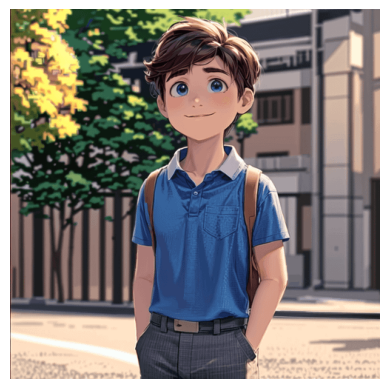

In [9]:
image = cv.imread('image.jpg')
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis("off")
plt.show()

In [10]:
mask = np.zeros(image.shape[:2], np.uint8)

bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

rect = (50, 50, image.shape[1]-100, image.shape[0]-100)

cv.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0), 0, 1).astype('uint8')

output = image * mask2[:, :, np.newaxis]

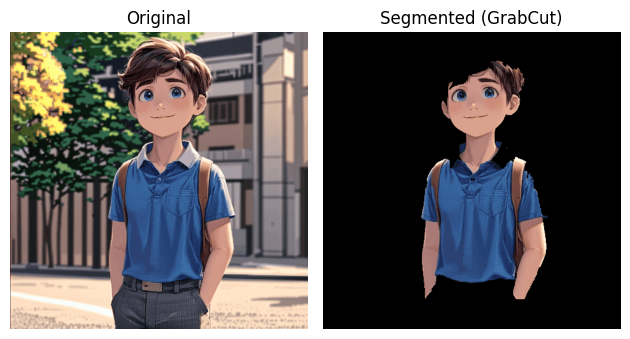

In [11]:
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(output, cv.COLOR_BGR2RGB))
plt.title("Segmented (GrabCut)")
plt.axis("off")

plt.tight_layout()
plt.show()